In [ ]:
import os
import random
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset

from models.DDPM_Schedule import DDPM, DDPMTopology
from models.unet import ContextUnet, ContextUnetGraph

from utils import *

from utils import vectorize_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
# Set a fixed random seed for reproducibility across multiple libraries
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)

# Check for CUDA (GPU support) and set device accordingly
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)  # For multi-GPU setups
    # Additional settings for ensuring reproducibility on CUDA
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # !nvidia-smi
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS is available.")
else:
    device = torch.device("cpu")
    print("CUDA not available.")

print("Using", device)

CUDA is available.
Using cuda


In [3]:
lr_data_path_train = 'data/lr_train.csv'
lr_data_path_test = 'data/lr_test.csv'
hr_data_path = 'data/hr_train.csv'

# load data
df_lr_train = pd.read_csv(lr_data_path_train)
df_lr_test = pd.read_csv(lr_data_path_test)
df_hr_train = pd.read_csv(hr_data_path)

lr_matrices = vectorize_matrix(df_lr_train, 160)
hr_matrices = vectorize_matrix(df_hr_train, 268)
test_matrices = vectorize_matrix(df_lr_test, 160)

hr_all = np.mean(hr_matrices, axis=0, keepdims=True).squeeze()
patch_size_lr = 20
lr_matrices_matched = []

for lr_mat in lr_matrices:
    lr_matrices_matched.append(patch_histogram_matching(lr_mat, hr_all, patch_size_lr, nbins=256))
lr_matrices = np.array(lr_matrices_matched)

lr_matrices_matched = []
for lr_mat in test_matrices:
    lr_matrices_matched.append(patch_histogram_matching(lr_mat, hr_all, patch_size_lr, nbins=256))
test_matrices = np.array(lr_matrices_matched)
test_lr_tensors = torch.stack([torch.FloatTensor(x) for x in test_matrices]).to(device)

# lr_matrices = np.concatenate([lr_matrices, augmented_lr_matrices], axis=0)
# hr_matrices.extend(hr_matrices)
# convert data to tensors
lr_tensors = torch.stack([torch.FloatTensor(x) for x in lr_matrices]).to(device)
hr_tensors = torch.stack([torch.FloatTensor(x) for x in hr_matrices]).to(device)

# needed dimension to use ddpm
hr_tensors = hr_tensors.unsqueeze(1)

dataset = TensorDataset(lr_tensors, hr_tensors)

In [4]:
patience = 5
n_epoch = 50
n_feat = 32
lr = 1e-3

# SOTA
# DDPM_model = DDPM
# unet_model = ContextUnet

# Custom Model
DDPM_model = DDPMTopology
unet_model = ContextUnetGraph

save = DDPM_model.__name__
# save = None

Fold 1:
Denoiser model total trainable parameters: 19478465


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train_loss: 0.6915, val_loss: 0.4212
Epoch 1, train_loss: 0.3788, val_loss: 0.4022
Epoch 2, train_loss: 0.3277, val_loss: 0.3552
Epoch 3, train_loss: 0.2822, val_loss: 0.3147
Epoch 4, train_loss: 0.2679, val_loss: 0.3238
Epoch 5, train_loss: 0.2379, val_loss: 0.2968
Epoch 6, train_loss: 0.2779, val_loss: 0.2885
Epoch 7, train_loss: 0.2253, val_loss: 0.2289
Epoch 8, train_loss: 0.2131, val_loss: 0.2158
Epoch 9, train_loss: 0.2343, val_loss: 0.2118
Epoch 10, train_loss: 0.2329, val_loss: 0.2450
Epoch 11, train_loss: 0.2246, val_loss: 0.2319
Epoch 12, train_loss: 0.2137, val_loss: 0.2262
Epoch 13, train_loss: 0.2463, val_loss: 0.2593
Epoch 14, train_loss: 0.2034, val_loss: 0.1859
Epoch 15, train_loss: 0.2009, val_loss: 0.2131
Epoch 16, train_loss: 0.2138, val_loss: 0.2113
Epoch 17, train_loss: 0.2207, val_loss: 0.2305
Epoch 18, train_loss: 0.2133, val_loss: 0.1873
Epoch 19, train_loss: 0.2126, val_loss: 0.2335
Early stopping triggered after 19 epochs.


100%|██████████| 100/100 [00:10<00:00,  9.59it/s]


Processing samples:   0%|          | 0/56 [00:00<?, ?it/s]

Overall MAE: 0.19767692685127258
Pearson Correlation Coefficient (PCC): 0.2969756
Jensen-Shannon Distance: 0.4543265164939791
Average MAE Betweenness Centrality: 0.020402830673386947
Average MAE Eigenvector Centrality: 0.014892370820882132
Average MAE PageRank Centrality: 0.0006085307521099059
Average Clustering MAE: 0.04690433362880044
Average Degree MAE: 0.2858022388059701


  0%|          | 0/112 [00:00<?, ?it/s]

torch.Size([1, 1, 268, 268])
Generated 112 predictions
Creating File at results/DDPMTopology/predictions_fold_1.csv...
Done!


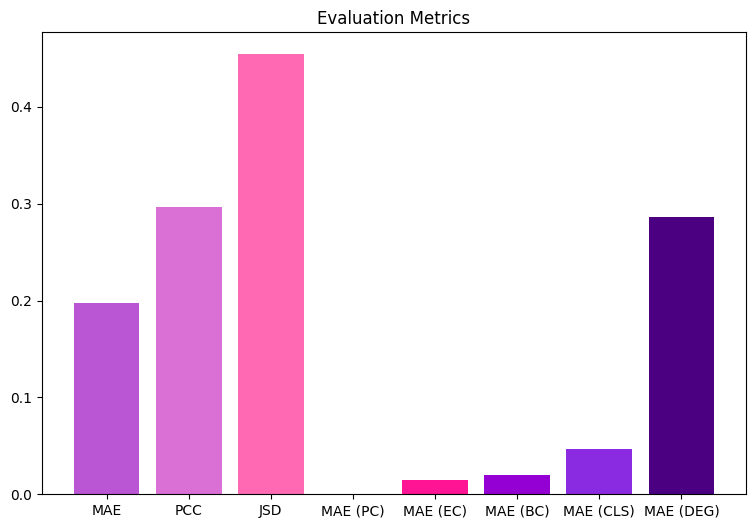

Fold 2:
Denoiser model total trainable parameters: 19478465


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train_loss: 0.7759, val_loss: 0.4655
Epoch 1, train_loss: 0.3938, val_loss: 0.3284
Epoch 2, train_loss: 0.3622, val_loss: 0.2868
Epoch 3, train_loss: 0.3083, val_loss: 0.2933
Epoch 4, train_loss: 0.2913, val_loss: 0.2771
Epoch 5, train_loss: 0.2361, val_loss: 0.2487
Epoch 6, train_loss: 0.2397, val_loss: 0.2143
Epoch 7, train_loss: 0.2609, val_loss: 0.2506
Epoch 8, train_loss: 0.2160, val_loss: 0.2460
Epoch 9, train_loss: 0.2385, val_loss: 0.2207
Epoch 10, train_loss: 0.1939, val_loss: 0.2110
Epoch 11, train_loss: 0.2326, val_loss: 0.2540
Epoch 12, train_loss: 0.2419, val_loss: 0.2184
Epoch 13, train_loss: 0.2242, val_loss: 0.2278
Epoch 14, train_loss: 0.1953, val_loss: 0.2523
Epoch 15, train_loss: 0.2242, val_loss: 0.1809
Epoch 16, train_loss: 0.1893, val_loss: 0.1827
Epoch 17, train_loss: 0.2171, val_loss: 0.1860
Epoch 18, train_loss: 0.2142, val_loss: 0.2504
Epoch 19, train_loss: 0.2034, val_loss: 0.2159
Epoch 20, train_loss: 0.2201, val_loss: 0.1778
Epoch 21, train_loss: 0

100%|██████████| 100/100 [00:10<00:00,  9.74it/s]


Processing samples:   0%|          | 0/56 [00:00<?, ?it/s]

Overall MAE: 0.21802502870559692
Pearson Correlation Coefficient (PCC): 0.251081
Jensen-Shannon Distance: 0.5156200871089043
Average MAE Betweenness Centrality: 0.02072060774405528
Average MAE Eigenvector Centrality: 0.015543570936778614
Average MAE PageRank Centrality: 0.0006289010670739941
Average Clustering MAE: 0.09394842890183767
Average Degree MAE: 0.3074053837953092


  0%|          | 0/112 [00:00<?, ?it/s]

torch.Size([1, 1, 268, 268])
Generated 112 predictions
Creating File at results/DDPMTopology/predictions_fold_2.csv...
Done!


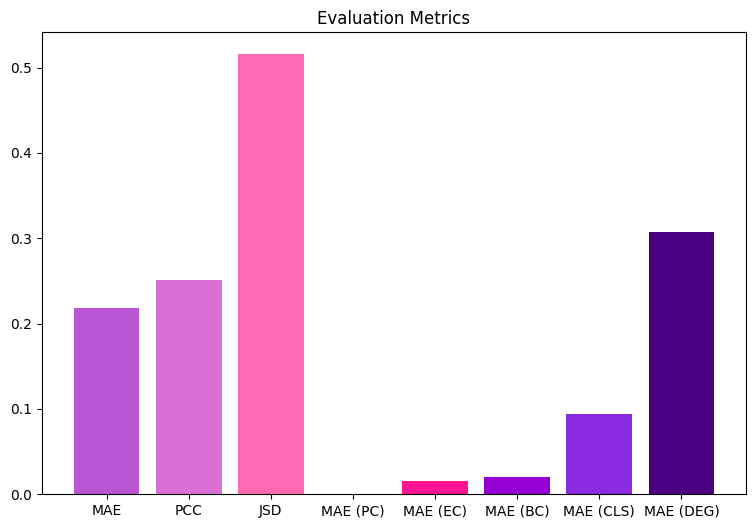

Fold 3:
Denoiser model total trainable parameters: 19478465


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train_loss: 0.7609, val_loss: 0.4595
Epoch 1, train_loss: 0.4029, val_loss: 0.3313
Epoch 2, train_loss: 0.3125, val_loss: 0.3180
Epoch 3, train_loss: 0.3071, val_loss: 0.3035
Epoch 4, train_loss: 0.2642, val_loss: 0.3003
Epoch 5, train_loss: 0.2422, val_loss: 0.2864
Epoch 6, train_loss: 0.2564, val_loss: 0.2466
Epoch 7, train_loss: 0.2496, val_loss: 0.2555
Epoch 8, train_loss: 0.2294, val_loss: 0.2405
Epoch 9, train_loss: 0.2113, val_loss: 0.1846
Epoch 10, train_loss: 0.2164, val_loss: 0.2112
Epoch 11, train_loss: 0.2168, val_loss: 0.2073
Epoch 12, train_loss: 0.2176, val_loss: 0.1928
Epoch 13, train_loss: 0.2274, val_loss: 0.2223
Epoch 14, train_loss: 0.1927, val_loss: 0.2135
Early stopping triggered after 14 epochs.


100%|██████████| 100/100 [00:09<00:00, 10.07it/s]


Processing samples:   0%|          | 0/55 [00:00<?, ?it/s]

Overall MAE: 0.21702460944652557
Pearson Correlation Coefficient (PCC): 0.2548865
Jensen-Shannon Distance: 0.5140396658049442
Average MAE Betweenness Centrality: 0.0207972460384263
Average MAE Eigenvector Centrality: 0.01481904779319068
Average MAE PageRank Centrality: 0.000628899094671245
Average Clustering MAE: 0.10402442045919093
Average Degree MAE: 0.3059430122116689


  0%|          | 0/112 [00:00<?, ?it/s]

torch.Size([1, 1, 268, 268])
Generated 112 predictions
Creating File at results/DDPMTopology/predictions_fold_3.csv...
Done!


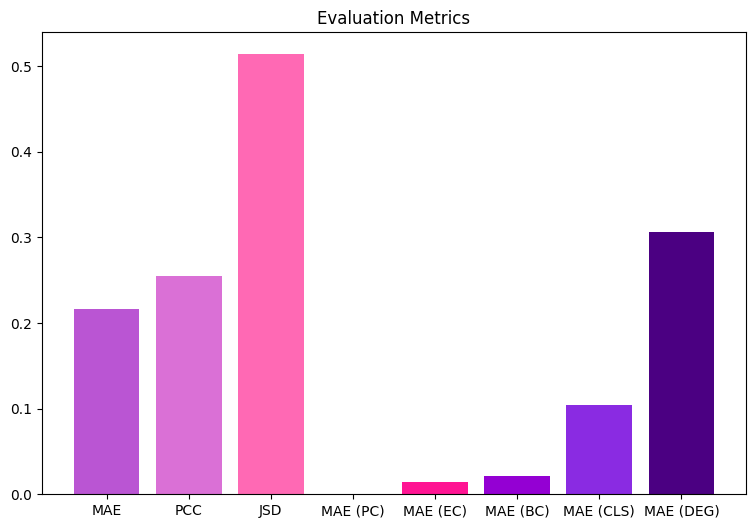

Results saved to results/DDPMTopology/metrics.csv


In [5]:
metrics_by_fold, run_history = run_kfold(DDPM_model, unet_model, n_feat, patience, n_epoch, lr, device, dataset, test_lr_tensors, k=3, seed=random_seed, plot=True, save=save)

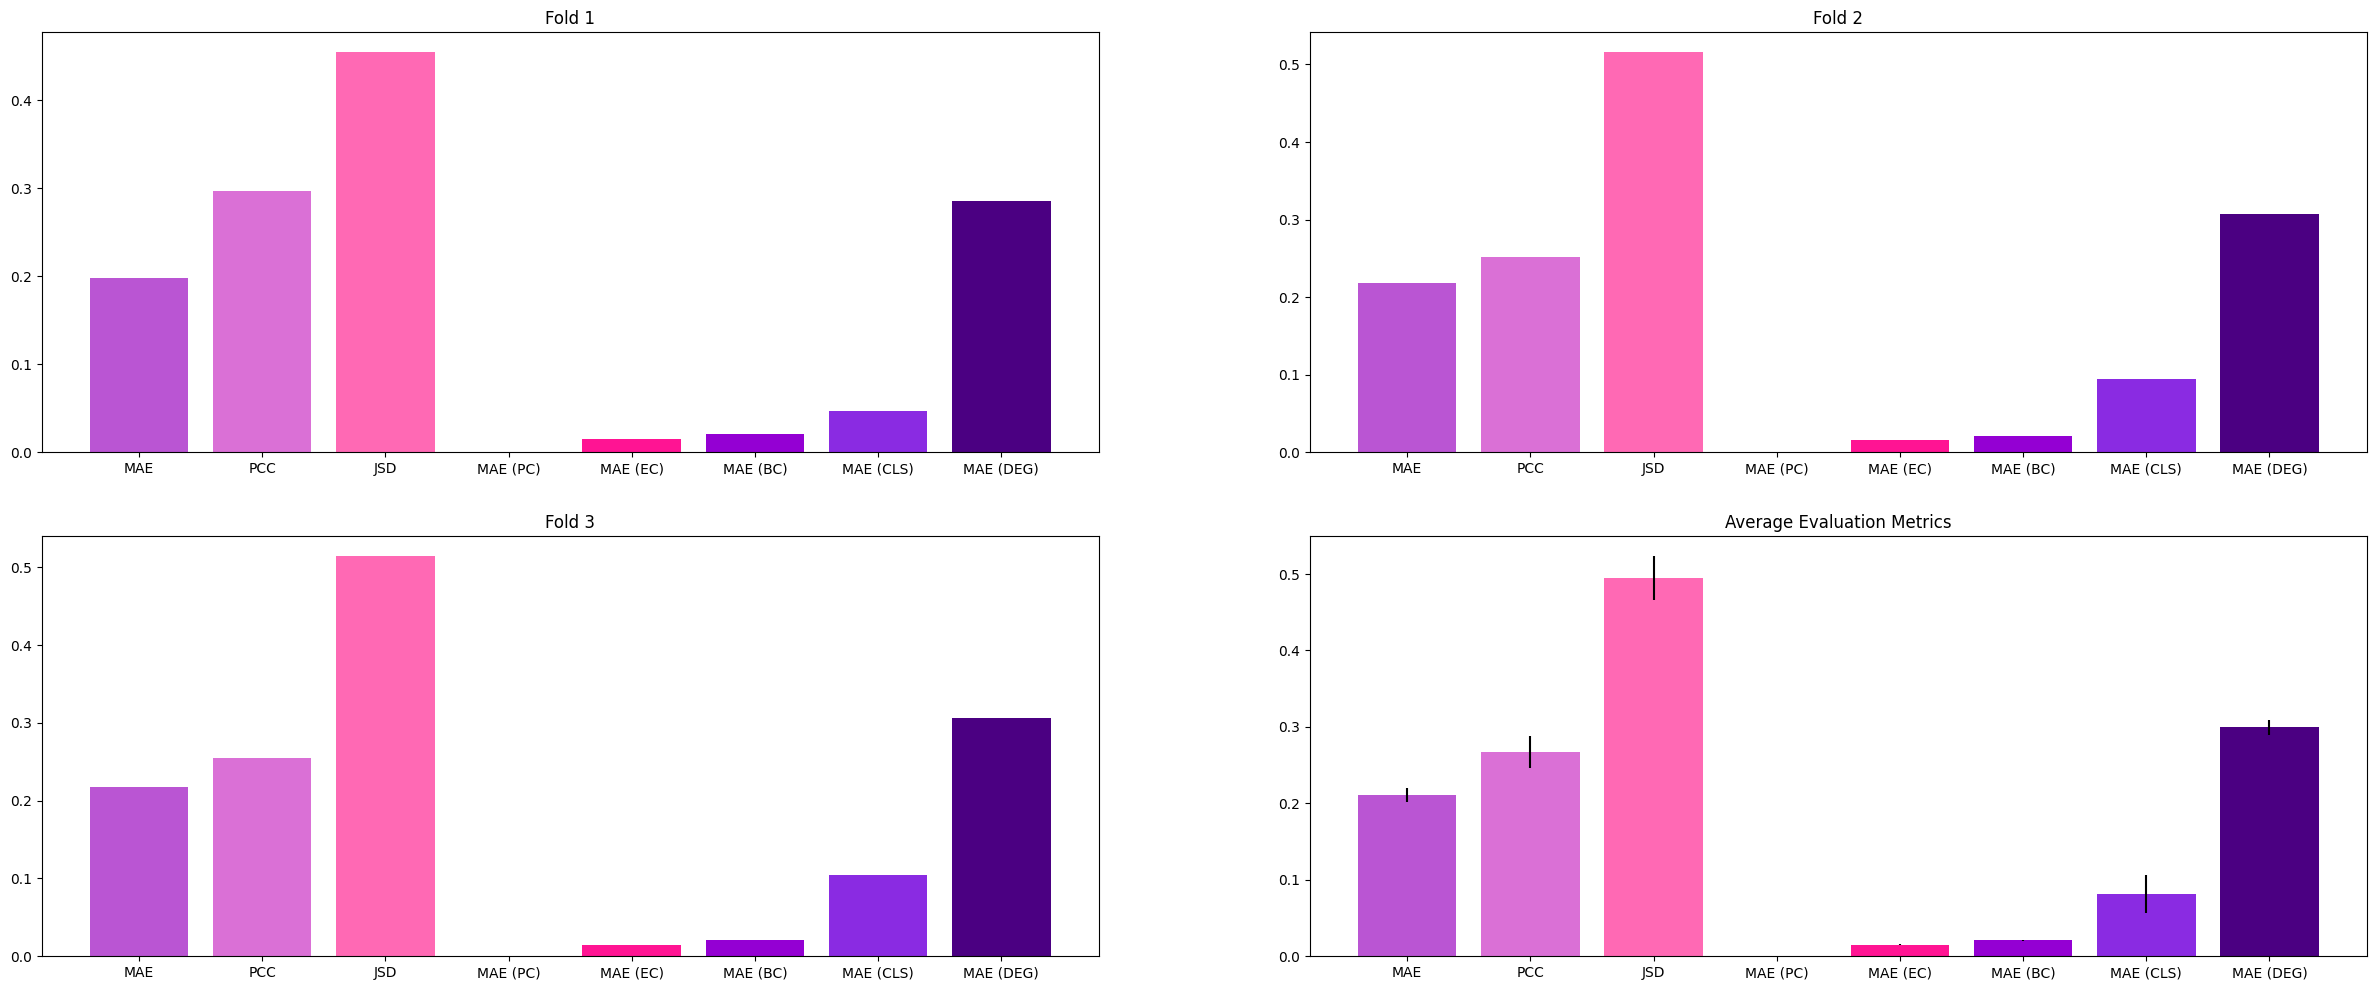

In [6]:
plot_metrics(metrics_by_fold, k=3)

In [7]:
for run_id, run_data in run_history.items():
    # Combine the training and evaluation metrics
    usage_data = run_data.get("system_usage", [])
    eval_data = run_data.get("system_usage_eval", [])
    time = run_data.get("time")
    combined_data = usage_data + eval_data

    # Calculate the maximum RAM_MB and VRAM_MB
    max_ram = max(entry["RAM_MB"] for entry in combined_data if "RAM_MB" in entry)
    max_vram = max(entry["VRAM_MB"] for entry in combined_data if "VRAM_MB" in entry)
    
    print(f"Run {run_id}: Max RAM = {max_ram} MB, Max VRAM = {max_vram} MB, Time = {time:.3f} sec")

Run 0: Max RAM = 1371.0546875 MB, Max VRAM = 16778.5 MB, Time = 168.789 sec
Run 1: Max RAM = 1463.625 MB, Max VRAM = 16780.5 MB, Time = 176.985 sec
Run 2: Max RAM = 1482.70703125 MB, Max VRAM = 16780.5 MB, Time = 160.925 sec
